# Descripción de la Base de Datos:
Se eligió de las bases de datos abiertos del INEGI https://www.inegi.org.mx/datosabiertos/https://www.inegi.org.mx/app/descarga/ficha.html?tit=81160&ag=0&f=csv  de la Encuesta de Sacrificio de Ganado en Rastros Municipales Anuales. Esta abarca la recolección de datos desde el año 1989 hasta el año 2024, teniendo un total de datos de 4484.

Mi variable de interés es el precio medio, dicha variable explica el monto promedio por tonelada de carne producida, expresada en pesos mexicanos, este se encuentra descrito por **PRECIO_MEDIO** en la base de datos. 

A continuación se describirán las variables  incluidas dentro de la base de datos, basados en el diccionario que llevaba consigo.

- **PRODUCTO**: Estadística de Sacrificio de Ganado en Rastros Municipales. Anual. De tipo categórica.
- **COBERTURA**: Nombre de la entidad federativa. De tipo categórica.
- **ANIO**: Año de referencia de los datos. De tipo numérica.
- **ID_ENTIDAD**: Clave numérica asignada a cada municipio, usando un rango de 0 a 32. De tipo numérica.
- **ESPECIE_GANADERA**: Clasificación de los animales(bovino,caprino,porcino,ovino). De tipo categórica.
- **CABEZAS_SACRIFICADAS**: Número de animales que ingresan al registro para su matanza. De tipo numérica.
- **ESTATUS_DATO_CBZ**: Situación de cada registro: D (Disponible) cuando se publica y cumple con la ley; ND (No disponible) si no se genera o está en proceso; NA (No aplicable) en casos de cruces incompatibles o cálculos no procedentes; NS (No significativo) cuando por redondeo un valor distinto de cero se expresa como tal; y C (Confidencial) cuando no puede publicarse por principios de confidencialidad de la Ley del Sistema Nacional de Información Estadística y Geográfica. De tipo categórica.
- **PRODUCCION_CARNE**: Volumen de carne total a partir del sacrifico. De tipo numérica.
- **ESTATUS_DATO_PROD**: Situación de cada registro: D (Disponible) cuando se publica y cumple con la ley; ND (No disponible) si no se genera o está en proceso; NA (No aplicable) en casos de cruces incompatibles o cálculos no procedentes; NS (No significativo) cuando por redondeo un valor distinto de cero se expresa como tal; y C (Confidencial) cuando no puede publicarse por principios de confidencialidad de la Ley del Sistema Nacional de Información Estadística y Geográfica. De tipo categórica.
- **VALOR_PRODUCCION**: Valor en unidades monetarias de la canre producida, expresada en miles de pesos. De tipo numérica.
- **PRECIO_MEDIO**: Monto promedio expresado en  pesos, medido por toneladas de carne. De tipo numérica.
- **ESTATUS_DATO_VPROD**: Situación de cada registro: D (Disponible) cuando se publica y cumple con la ley; ND (No disponible) si no se genera o está en proceso; NA (No aplicable) en casos de cruces incompatibles o cálculos no procedentes; NS (No significativo) cuando por redondeo un valor distinto de cero se expresa como tal; y C (Confidencial) cuando no puede publicarse por principios de confidencialidad de la Ley del Sistema Nacional de Información Estadística y Geográfica. De tipo categórica.
- **ESTATUS_DATO_PMED**: Situación de cada registro: D (Disponible) cuando se publica y cumple con la ley; ND (No disponible) si no se genera o está en proceso; NA (No aplicable) en casos de cruces incompatibles o cálculos no procedentes; NS (No significativo) cuando por redondeo un valor distinto de cero se expresa como tal; y C (Confidencial) cuando no puede publicarse por principios de confidencialidad de la Ley del Sistema Nacional de Información Estadística y Geográfica. De tipo categórica.
- **ESTATUS**: Estatus de las cifras conforme a los lineamientos del INEGI. De tipo categórica.

# Justificación del modelo
Podemos plantear que una regresión lineal podría ser una buena aproximación lineal ya que nace de la idea de que la variable de salida elegida, **PRECIO_MEDIO** tiende a mantener relaciones aproximadamente proporcionales con los factores productivos muestran patrones de precios más estables en el tiempo, mientras que los tipos de producción pueden introducir variaciones que se expresan de manera lineal en el promedio.
Aunque el precio también puede estar influido por otro tipo de dinámicas del mercado, que no siempre siguen este comportamiento, lo podremos comprobar más adelante.
En pocas palabras, lo estaré trabajando por simplicidad y claridad interpretativa todo para fundamentar la estadística. 


**Manejo de la base de datos**

Se leen los datos del archivo para después ser desplegados en consola, pero previo a esto se eliminan valores NaN que puedan entorpecer el estudio o provocar ruido en el modelo y se suplantan por 0 en su lugar.


Concretamente se imprimen las primeras 75 filas, para verificar la eliminación correcta de los huecos,  pues se presenta un hueco desde la fila 73.


Esta metodología es muy común para la manipulación de los datos, pues se busca solucionar problemas presentes en la base.
Específicamente me centraré en buscar solución a los huecos, colinealidad y variables categóricas que en esta base se encuentren.


Para entender estos términos daré una breve definición enfocada al contexto de mi estudio: 

En mi base de datos podemos ver que la columna de **PRODUCCION_CARNE** presenta algunos huecos y para esto decidí rellenarlos con ceros, pues al ser solo una variable, no parecía conveniente eliminar datos tan completos.


In [110]:
import pandas as pd
import numpy as np

df = pd.read_csv("Sacrificio.csv")

print("Primeras filas del DataFrame:")
print(df.head(10))

df = df.replace(r'^\s*$', 0, regex=True).fillna(0)

df.head(75)

Primeras filas del DataFrame:
                                            PRODUCTO COBERTURA  ANIO  \
0  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   
1  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   
2  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   
3  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   
4  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   
5  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   
6  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   
7  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   
8  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   
9  Estadística de Sacrificio de Ganado en Rastros...   Estatal  1989   

   ID_ENTIDAD ESPECIE_GANADERA  CABEZAS_SACRIFICADAS ESTATUS_DATO_CBZ  \
0           1    Ganado bovino                 37768       Disponible   
1           2    Ganado bovino 

,PRODUCTO,COBERTURA,ANIO,ID_ENTIDAD,ESPECIE_GANADERA,CABEZAS_SACRIFICADAS,ESTATUS_DATO_CBZ,PRODUCCION_CARNE,ESTATUS_DATO_PROD,VALOR_PRODUCCION,ESTATUS_DATO_VPROD,PRECIO_MEDIO,ESTATUS_DATO_PMED,ESTATUS
0,Estadística de Sacrificio de Ganado en Rastros...,Estatal,1989,1,Ganado bovino,37768,Disponible,7024,Disponible,41795,Disponible,5950,Disponible,Cifras Definitivas
1,Estadística de Sacrificio de Ganado en Rastros...,Estatal,1989,2,Ganado bovino,65334,Disponible,14190,Disponible,81577,Disponible,5749,Disponible,Cifras Definitivas
2,Estadística de Sacrificio de Ganado en Rastros...,Estatal,1989,3,Ganado bovino,23411,Disponible,3700,Disponible,24652,Disponible,6663,Disponible,Cifras Definitivas
3,Estadística de Sacrificio de Ganado en Rastros...,Estatal,1989,4,Ganado bovino,11907,Disponible,2459,Disponible,15035,Disponible,6114,Disponible,Cifras Definitivas
4,Estadística de Sacrificio de Ganado en Rastros...,Estatal,1989,5,Ganado bovino,94522,Disponible,15589,Disponible,91397,Disponible,5863,Disponible,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Estadística de Sacrificio de Ganado en Rastros...,Estatal,1989,7,Ganado ovino,90,Disponible,2,Disponible,8,Disponible,4000,Disponible,Cifras Definitivas
71,Estadística de Sacrificio de Ganado en Rastros...,Estatal,1989,8,Ganado ovino,1683,Disponible,31,Disponible,177,Disponible,5710,Disponible,Cifras Definitivas
72,Estadística de Sacrificio de Ganado en Rastros...,Estatal,1989,9,Ganado ovino,152164,Disponible,3013,Disponible,21818,Disponible,7241,Disponible,Cifras Definitivas
73,Estadística de Sacrificio de Ganado en Rastros...,Estatal,1989,10,Ganado ovino,19,Disponible,0,No significativo,3,Disponible,5579,Disponible,Cifras Definitivas


Se imprimen las dimensiones limpias de nuestro conjunto de datos.

In [111]:
print(df.shape)

(4484, 14)


Aquí decido eliminar de mi estudio las variables categóricas de: **ESTATUS_DATO_CBZ**,**ESTATUS_DATO_PROD**, **ESTATUS_DATO_VPROD**, **ESTATUS_DATO_PMED**, **COBERTURA**, **PRODUCTO**, **ESTATUS**.
Todo esto porque no aportan ningún tipo de información relevante al estudio.
Posteriormente se imprimen las primeras 65 filas de la base.                                                                  

In [112]:
columns_to_drop = ['ESTATUS_DATO_CBZ', 'ESTATUS_DATO_PROD', 'ESTATUS_DATO_VPROD', 'ESTATUS_DATO_PMED', 'COBERTURA', 'PRODUCTO', 'ESTATUS']

# Eliminar las columnas
df = df.drop(columns=columns_to_drop)
df.head(65)

,ANIO,ID_ENTIDAD,ESPECIE_GANADERA,CABEZAS_SACRIFICADAS,PRODUCCION_CARNE,VALOR_PRODUCCION,PRECIO_MEDIO
0,1989,1,Ganado bovino,37768,7024,41795,5950
1,1989,2,Ganado bovino,65334,14190,81577,5749
2,1989,3,Ganado bovino,23411,3700,24652,6663
3,1989,4,Ganado bovino,11907,2459,15035,6114
4,1989,5,Ganado bovino,94522,15589,91397,5863
...,...,...,...,...,...,...,...
60,1989,29,Ganado caprino,406,6,47,7833
61,1989,30,Ganado caprino,2141,39,278,7128
62,1989,31,Ganado caprino,0,0,0,0
63,1989,32,Ganado caprino,16576,274,2148,7839


Otro de los problemas mas comúnes trabajando con bases de datos son las variables categóricas estas al no poder ser cuantificadas resultarían en problemas que pueden relentizar el proceso de estudio, además de que no se pueden usar directamente el tipo de modelo elegido, en este caso lineal. 

Decidí crear funciones, en Python se conocen como dummies, que nos convierte estas variables categóricas en columnas nuevas y diferentes para cada respuesta que creemos para ella, sus valores medidos en booleanos.
Estas funciones nos facilitan el proceso de predicción.

Para esta parte, especifiqué de la columna **ESPECIE_GANADERA** que el **ID_ENTIDAD** sea forzosamente un string, en caso de que presente valores numéricos o ceros a la izqueirda.
Después limpié los valores de **ESPECIE_GANADERA** para quitar posibles espacios o caracteres invisibles y los imprimpí. 
Luego me dediqué a crear las nuevas columnas para cada tipo de ganado y me aseguré de convertir la respuesta de cada tipo de ganado en un entero de 0 o 1. 
Después imprimí las primeras 65 filas, igualmente para verificar su correcta modificación y por último eliminé la columna de **ESPECIE_GANADERA**.


In [113]:
print(df['ESPECIE_GANADERA'].unique())

df['ID_ENTIDAD'] = df['ID_ENTIDAD'].astype(str).str.strip()  # Convertir a str y eliminar espacios

df['ESPECIE_GANADERA'] = df['ESPECIE_GANADERA'].str.strip().str.lower()  # Convertir a minúsculas y quitar espacios

# Verificar los valores después de limpiarlos
print(df['ESPECIE_GANADERA'].unique())

df['Ganado Bovino'] = df['ESPECIE_GANADERA'] == 'ganado bovino'
df['Ganado Porcino'] = df['ESPECIE_GANADERA'] == 'ganado porcino'
df['Ganado Ovino'] = df['ESPECIE_GANADERA'] == 'ganado ovino'
df['Ganado Caprino'] = df['ESPECIE_GANADERA'] == 'ganado caprino'

df['Ganado Bovino'] = df['Ganado Bovino'].astype(int)
df['Ganado Porcino'] = df['Ganado Porcino'].astype(int)
df['Ganado Ovino'] = df['Ganado Ovino'].astype(int)
df['Ganado Caprino'] = df['Ganado Caprino'].astype(int)

df = df.drop('ESPECIE_GANADERA', axis = 1)
df.head(65)

['Ganado bovino' 'Ganado caprino' 'Ganado ovino' 'Ganado porcino']
['ganado bovino' 'ganado caprino' 'ganado ovino' 'ganado porcino']


,ANIO,ID_ENTIDAD,CABEZAS_SACRIFICADAS,PRODUCCION_CARNE,VALOR_PRODUCCION,PRECIO_MEDIO,Ganado Bovino,Ganado Porcino,Ganado Ovino,Ganado Caprino
0,1989,1,37768,7024,41795,5950,1,0,0,0
1,1989,2,65334,14190,81577,5749,1,0,0,0
2,1989,3,23411,3700,24652,6663,1,0,0,0
3,1989,4,11907,2459,15035,6114,1,0,0,0
4,1989,5,94522,15589,91397,5863,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
60,1989,29,406,6,47,7833,0,0,0,1
61,1989,30,2141,39,278,7128,0,0,0,1
62,1989,31,0,0,0,0,0,0,0,1
63,1989,32,16576,274,2148,7839,0,0,0,1


Decidí convertir las variables **PRODUCCION_CARNE** y **VALOR_PRODUCCION** a un mismo formato numérico porque al importar la base de datos noté que podían estar guardadas como float64 e int64. Si mantenía esos datos como tipos diferentes, no iba a poder usarlos en operaciones matemáticas ni en la construcción de mi modelo de regresión.

In [114]:
df['PRODUCCION_CARNE'] = pd.to_numeric(df['PRODUCCION_CARNE'], errors='coerce')
df['VALOR_PRODUCCION'] = pd.to_numeric(df['VALOR_PRODUCCION'], errors='coerce')

# Verifica los tipos de datos después de la conversión
print(df.dtypes)

print(df[['PRODUCCION_CARNE', 'VALOR_PRODUCCION']].head(10))

ANIO                      int64
ID_ENTIDAD               object
CABEZAS_SACRIFICADAS      int64
PRODUCCION_CARNE        float64
VALOR_PRODUCCION          int64
PRECIO_MEDIO              int64
Ganado Bovino             int64
Ganado Porcino            int64
Ganado Ovino              int64
Ganado Caprino            int64
dtype: object
   PRODUCCION_CARNE  VALOR_PRODUCCION
0            7024.0             41795
1           14190.0             81577
2            3700.0             24652
3            2459.0             15035
4           15589.0             91397
5            5954.0             35482
6           17471.0            105021
7           20939.0            113626
8           38810.0            247655
9            4378.0             27412


Otro de los temas que surgen al hacer este estudio son las interacciones las cuales busca capturar el efecto combinado de ambas sobre la variable de salida, más allá del efecto individual que cada una pueda tener por separado.


En el análisis, la interacción entre cabezas sacrificadas y producción de carne podría ayudarme a identificar si la combinación de cantidad de animales y volumen generado tiene un papel relevante en explicar variaciones del precio medio.

Aquí hice una nueva columna llamada **INTERACCION_CABEZAS_PRODUCCION** multiplicando las variables **CABEZAS_SACRIFICADAS** y **PRODUCCION_CARNE**, porque me interesa capturar el efecto combinado de ambas, porque no solo importa cuántas cabezas de ganado se sacrifican ni cuánto volumen de carne se produce por separado, sino también la interacción entre ambas, ya que juntas pueden reflejar la intensidad de la producción en cada registro.
Con ella puedo explorar si existe un patrón más fuerte o significativo y saber si incluir esta interacción dentro del análisis de regresión.

In [115]:
# Crear una nueva columna de interacción entre 'CABEZAS_SACRIFICADAS' y 'PRODUCCION_CARNE'
df['INTERACCION_CABEZAS_PRODUCCION'] = df['CABEZAS_SACRIFICADAS'] * df['PRODUCCION_CARNE']
# Verificar el resultado de las primeras filas
df[['CABEZAS_SACRIFICADAS', 'PRODUCCION_CARNE', 'INTERACCION_CABEZAS_PRODUCCION']].head(125)

,CABEZAS_SACRIFICADAS,PRODUCCION_CARNE,INTERACCION_CABEZAS_PRODUCCION
0,37768,7024.0,2.652824e+08
1,65334,14190.0,9.270895e+08
2,23411,3700.0,8.662070e+07
3,11907,2459.0,2.927931e+07
4,94522,15589.0,1.473503e+09
...,...,...,...
120,100182,5290.0,5.299628e+08
121,44738,2836.0,1.268770e+08
122,39440,2978.0,1.174523e+08
123,67083,4179.0,2.803399e+08


Igualmente hice una nueva interacción entre **PRODUCCION_CARNE** y **VALOR_PRODUCCION** y la llamé **INTERACCION_CARNE_VALOR** con los mismos objetivos.
Para posteriormente imprimir las primeras 125 filas en tabla y agregue las interacciones en mi base de datos.

In [116]:
df['INTERACCION_CARNE_VALOR'] = df['PRODUCCION_CARNE'] * df['VALOR_PRODUCCION']
df[['PRODUCCION_CARNE', 'VALOR_PRODUCCION', 'INTERACCION_CARNE_VALOR']].head(125)

,PRODUCCION_CARNE,VALOR_PRODUCCION,INTERACCION_CARNE_VALOR
0,7024.0,41795,2.935681e+08
1,14190.0,81577,1.157578e+09
2,3700.0,24652,9.121240e+07
3,2459.0,15035,3.697106e+07
4,15589.0,91397,1.424788e+09
...,...,...,...
120,5290.0,35978,1.903236e+08
121,2836.0,18497,5.245749e+07
122,2978.0,17408,5.184102e+07
123,4179.0,24271,1.014285e+08


Otro de los problemas más básicos es la colinealidad, esta ocurre cuando dos o más variables independientes están fuertemente correlacionadas entre sí, lo que significa que aportan información muy similar. Esto puede provocar que los coeficientes de la regresión se vuelvan inestables, difíciles de interpretar e incluso influyan negativamente en la capacidad predictiva del modelo.


Por eso, utilicé un heatmap para visualizar las correlaciones y apliqué un umbral de 0.85 para identificar los pares de variables con correlación muy alta. Después, programé un ciclo que compara cada par de variables colineales y decide cuál conservar en función de su relación con mi variable de salida **PRECIO_MEDIO**. De esta manera, elimino la variable menos relevante y reduzco el riesgo de colinealidad.


Finalmente, eliminé las columnas **CABEZAS_SACRIFICADAS**, **INTERACCION_CARNE_VALOR** del DataFrame con df.drop(), asegurando que mi modelo trabaje con predictores informativos pero no redundantes.

C:\Users\sofia\AppData\Local\Temp\ipykernel_25724\2806611969.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(cor, cmap="coolwarm", annot=cor.applymap(lambda x: f"{x:.2f}" if x >= 0.85 else " "), fmt="", cbar=True)


Columnas a eliminar por prueba de colinealidad: {'CABEZAS_SACRIFICADAS', 'INTERACCION_CARNE_VALOR'}


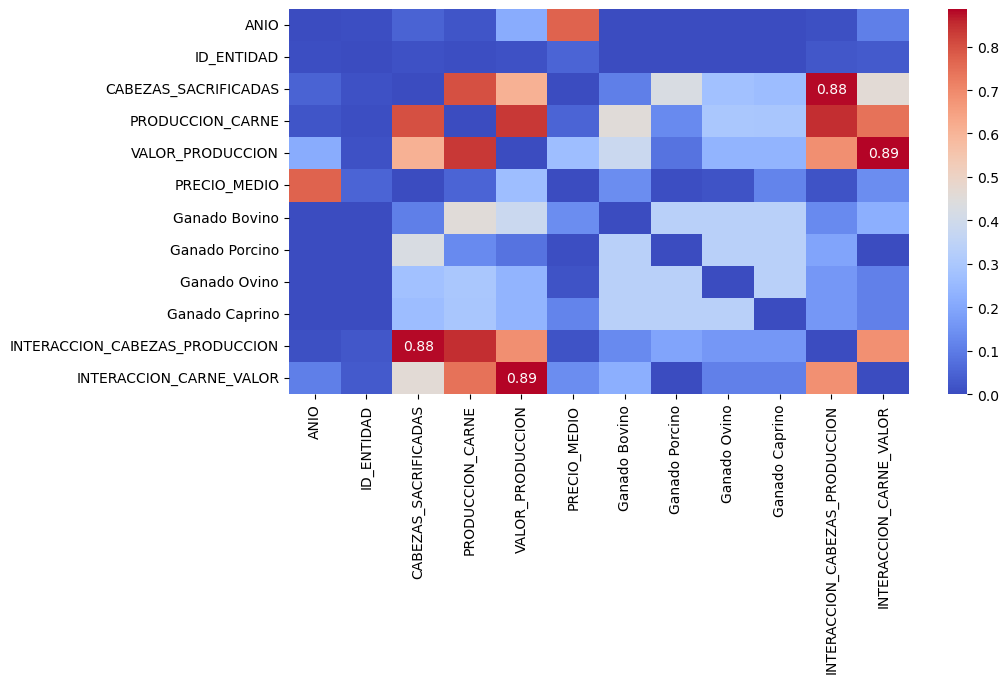

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

cor = df.corr().abs()  
np.fill_diagonal(cor.values, 0)
sns.heatmap(cor, cmap="coolwarm", annot=cor.applymap(lambda x: f"{x:.2f}" if x >= 0.85 else " "), fmt="", cbar=True)
# Obtener los índices (i,j) de la posición del valor máximo
i, j = np.unravel_index(cor.values.argmax(), cor.shape)
y = df.PRECIO_MEDIO
corr_matrix = df.corr().abs()
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.85:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            if abs(df[colname1].corr(y)) > abs(df[colname2].corr(y)):
                to_drop.add(colname2)
            else:
                to_drop.add(colname1)
print("Columnas a eliminar por prueba de colinealidad:", to_drop)
df = df.drop(to_drop,axis = 1)

Para continuar con mi trabajo de solucionar variables categóricas, previamente explicadas, decidí crear un diccionario de estados con sus códigos de **ID_ENTIDAD** que se explican en el diccionario adjunto a la base de datos, para transformar esa columna en variables dummy que representen cada entidad federativa, y se posicione un 0 si no representa la entidad y un 1 si, sí la representa. 


Finalmente, revisé las nuevas columnas generadas para asegurarme de que tanto las variables dummy de los estados como las interacciones quedaran bien incorporadas al DataFrame y listas para usarse en el modelo de regresión.

In [118]:
import pandas as pd

# Crear el diccionario de estados con los códigos de ID_ENTIDAD
estado_dict = {
    "Aguascalientes": "01", "Baja California": "02", "Baja California Sur": "03", "Campeche": "04",
    "Coahuila de Zaragoza": "05", "Colima": "06", "Chiapas": "07", "Chihuahua": "08",
    "Ciudad de México": "09", "Durango": "10", "Guanajuato": "11", "Guerrero": "12",
    "Hidalgo": "13", "Jalisco": "14", "México": "15", "Michoacán de Ocampo": "16", "Morelos": "17",
    "Nayarit": "18", "Nuevo León": "19", "Oaxaca": "20", "Puebla": "21", "Querétaro": "22",
    "Quintana Roo": "23", "San Luis Potosí": "24", "Sinaloa": "25", "Sonora": "26", "Tabasco": "27",
    "Tamaulipas": "28", "Tlaxcala": "29", "Veracruz de Ignacio de la Llave": "30", "Yucatán": "31",
    "Zacatecas": "32"
}

df['ID_ENTIDAD'] = df['ID_ENTIDAD'].astype(str).str.strip()  # Limpiar espacios extra

for estado, codigo in estado_dict.items():
    df[estado] = df['ID_ENTIDAD'].apply(lambda x: 1 if x == codigo else 0)

df['INTERACCION_CARNE_VALOR'] = df['PRODUCCION_CARNE'] * df['VALOR_PRODUCCION']

print("Columnas generadas:", df.columns)

df.head(154)

Columnas generadas: Index(['ANIO', 'ID_ENTIDAD', 'PRODUCCION_CARNE', 'VALOR_PRODUCCION',
       'PRECIO_MEDIO', 'Ganado Bovino', 'Ganado Porcino', 'Ganado Ovino',
       'Ganado Caprino', 'INTERACCION_CABEZAS_PRODUCCION', 'Aguascalientes',
       'Baja California', 'Baja California Sur', 'Campeche',
       'Coahuila de Zaragoza', 'Colima', 'Chiapas', 'Chihuahua',
       'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'México', 'Michoacán de Ocampo', 'Morelos', 'Nayarit',
       'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas',
       'INTERACCION_CARNE_VALOR'],
      dtype='object')


,ANIO,ID_ENTIDAD,PRODUCCION_CARNE,VALOR_PRODUCCION,PRECIO_MEDIO,Ganado Bovino,Ganado Porcino,Ganado Ovino,Ganado Caprino,INTERACCION_CABEZAS_PRODUCCION,...,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas,INTERACCION_CARNE_VALOR
0,1989,1,7024.0,41795,5950,1,0,0,0,2.652824e+08,...,0,0,0,0,0,0,0,0,0,2.935681e+08
1,1989,2,14190.0,81577,5749,1,0,0,0,9.270895e+08,...,0,0,0,0,0,0,0,0,0,1.157578e+09
2,1989,3,3700.0,24652,6663,1,0,0,0,8.662070e+07,...,0,0,0,0,0,0,0,0,0,9.121240e+07
3,1989,4,2459.0,15035,6114,1,0,0,0,2.927931e+07,...,0,0,0,0,0,0,0,0,0,3.697106e+07
4,1989,5,15589.0,91397,5863,1,0,0,0,1.473503e+09,...,0,0,0,0,0,0,0,0,0,1.424788e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1990,22,6624.0,49123,7416,1,0,0,0,2.439023e+08,...,0,0,0,0,0,0,0,0,0,3.253908e+08
150,1990,23,4685.0,37719,8051,1,0,0,0,1.089309e+08,...,0,0,0,0,0,0,0,0,0,1.767135e+08
151,1990,24,14343.0,104199,7265,1,0,0,0,1.026715e+09,...,1,0,0,0,0,0,0,0,0,1.494526e+09
152,1990,25,27334.0,199394,7295,1,0,0,0,4.237344e+09,...,0,1,0,0,0,0,0,0,0,5.450236e+09


Continuamos con la metodología de selección de características, y es que no todas las variables disponibles aportan información útil ya que algunas pueden ser irrelevantes y otras estar tan correlacionadas entre sí que generan redundancia y problemas de colinealidad. Entonces al reducir el número de predictores a un subconjunto más representativo, busco que el modelo sea más estable e interpretable. 


Esta metodología evalúa distintas combinaciones de variables de manera iterativa y se queda con aquellas que maximizan una métrica de desempeño, en este caso el R2.


Para implementar esto, primero dividí mis datos en un conjunto de entrenamiento y otro de prueba, con el fin de entrenar el modelo y luego evaluar qué tan bien generaliza a datos nuevos. Después definí mi variable de salida como el **PRECIO_MEDIO** y eliminé columnas que no eran directamente predictoras como **ID_ENTIDAD** y **ANIO**.


Primero apliqué el método Forward Selection, que comienza con pocas variables y va agregando una a una, siempre escogiendo la que más mejora el modelo. Esto me permitió obtener un primer subconjunto de predictores relevantes.

Con este método, el modelo se quedó con las siguientes características:
**PRODUCCION_CARNE**, **VALOR_PRODUCCION**, **Ganado Bovino**, **INTERACCION_CABEZAS_PRODUCCION**, **Nuevo León**, **Tabasco**,**Tlaxcala** e **INTERACCION_CARNE_VALOR**.


Luego, sobre ese mismo subconjunto, utilicé el método Backward Selection, que hace lo contrario: parte de varias variables y va eliminando las menos útiles, hasta quedarse con un conjunto más reducido y bueno, al final se quedó con estas variables: 
**PRODUCCION_CARNE**, **VALOR_PRODUCCION**, **Ganado Bovino**, **INTERACCION_CABEZAS_PRODUCCION**, e **INTERACCION_CARNE_VALOR**.

 
Por último, comparé el desempeño de ambos modelos con la métrica 
R2 para validar si realmente la reducción de variables aportó mejoras.

En el caso del modelo Forward, obtuve un R2 de aproximadamente 0.2495. Esto quiere decir que, con las ocho variables seleccionadas el modelo logra explicar alrededor del 23.7% de la variabilidad observada en el Precio Medio. Aunque no es un valor muy alto, sí refleja que esas variables aportan cierta información útil.


Por otro lado, en el modelo Backward, el R2 fue ligeramente menor (0.2345). Esto significa que al reducir el número de variables a cinco, el modelo explica cerca del 23.4% de la variabilidad.

Todo esto me muestra que las variables que seleccioné tienen cierta capacidad para explicar el Precio Medio, pero también que existen otros factores no considerados en el modelo que influyen en gran medida en esta variable. Esto es lógico porque los precios también dependen de condiciones de mercado, políticas, costos de transporte o estacionalidad, etc,  que no están reflejados directamente en mi dataset.



In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

train=df.sample(frac=0.8)
test=df.drop(train.index)
print("Train:",train.shape)
print("Test:",test.shape)
sum=train.shape[0]+test.shape[0]
print("Suma train+test:",sum)
print(train.head(15))

Xtrain = train.drop(['PRECIO_MEDIO','ID_ENTIDAD', 'ANIO'], axis=1)
ytrain = train['PRECIO_MEDIO']

Xtest= train.drop('PRECIO_MEDIO', axis=1)
ytest = train['PRECIO_MEDIO']

linearR = LinearRegression()

sfs_forward = sfs(linearR,k_features=(2, 8),forward=True,floating=False,scoring='r2',cv=10,n_jobs=-1)

sfs_forward = sfs_forward.fit(Xtrain, ytrain)
feat_forward = list(sfs_forward.k_feature_names_)
print("Características seleccionadas (Forward):", feat_forward)

XtrainForward = Xtrain[feat_forward]
XtestForward  = Xtest[feat_forward]

linearR.fit(XtrainForward, ytrain)
ypredForward = linearR.predict(XtestForward)

r2Forward = r2_score(ytest, ypredForward)
print("R² del modelo Forward:", r2Forward)

sfs_backward = sfs(estimator=linearR,k_features=(2, 5),forward=False,floating=False,scoring='r2',cv=10,n_jobs=-1)

sfs_backward = sfs_backward.fit(Xtrain[feat_forward], ytrain)

feat_backward = list(sfs_backward.k_feature_names_)
print("Características seleccionadas (Backward desde Forward):", feat_backward)

XtrainBackward = Xtrain[feat_backward]
XtestBackward  = Xtest[feat_backward]

linearR.fit(XtrainBackward, ytrain)
ypredBackward = linearR.predict(XtestBackward)

r2Backward = r2_score(ytest, ypredBackward)
import statsmodels.api as sm
print("R² del modelo Backward:", r2Backward)


Train: (3587, 43)
Test: (897, 43)
Suma train+test: 4484
      ANIO ID_ENTIDAD  PRODUCCION_CARNE  VALOR_PRODUCCION  PRECIO_MEDIO  \
1655  2002         25           16172.0            401235         24811   
3876  2020         14          110553.0           6908726         62492   
3887  2020         25            6390.0            416428         65165   
4136  2022         26            5391.0            406027         75321   
3875  2020         13           13902.0            867431         62398   
1248  1998         21           21796.0            390663         17924   
3025  2013         31            5493.0            228416         41581   
3608  2017         25            4483.0            222083         49543   
3684  2018          7               0.0                 0             0   
2980  2012         17            8594.0            275086         32010   
4262  2023         28            6628.0            483932         73009   
1620  2001         21           21240.0     

En este paso ajusté un modelo de regresión lineal múltiple (OLS, Ordinary Least Squares). Este tipo de modelo busca explicar el comportamiento de una variable dependiente en mi caso el Precio Medio a partir de varias variables independientes, con eso podemos decir que cada predictor tiene un efecto aditivo y proporcional sobre la variable de salida, representado por un coeficiente que indica cuánto cambia el Precio Medio cuando esa variable aumenta en una unidad, manteniendo las demás constantes.

Primero añadí la constante a mis datos (sm.add_constant) porque OLS necesita un término independiente que represente el valor esperado de la variable dependiente cuando todos los predictores valen cero. Luego entrené el modelo con sm.OLS().fit() y revisé el resumen estadístico.


En mi modelo OLS obtuve un R2 de 0.234, lo que significa que logro explicar alrededor del 23% de la variabilidad del Precio Medio. Aunque no es un valor alto, sí confirma que las variables que seleccioné tienen un peso real en la explicación del comportamiento, mientras que el resto de la variabilidad depende de factores externos que no están en mi base de datos.
El valor F del modelo fue de 1.07e-204, lo que indica que en conjunto las variables explicativas son altamente significativas y que el modelo no se ajusta al azar.

Al revisar los coeficientes, encontré un comportamiento lógico: la Producción de Carne tiene un efecto negativo (-1.1992), lo que refleja que cuando aumenta la producción el precio medio tiende a disminuir por efecto de la oferta; mientras que el Valor de Producción tiene un efecto positivo (0.0433), es decir, a mayor valor económico generado el precio medio tiende a subir.
También observé que el Ganado Bovino eleva el precio medio en aproximadamente 6,997 unidades respecto a otras especies, lo que refleja la importancia de este tipo de ganado en el mercado. 

En cuanto a las interacciones, la de cabezas sacrificadas con producción tiene un efecto positivo, lo que sugiere que cuando ambas crecen de forma conjunta, el precio medio también se incrementa ligeramente; en cambio, la interacción entre producción de carne y valor de producción tiene un efecto negativo, mostrando que cuando ambas variables aumentan al mismo tiempo, el precio medio se ve presionado a la baja por un exceso de oferta.

Todos los predictores presentan p-values prácticamente iguales a cero, por lo que son altamente significativos.

                            OLS Regression Results                            
Dep. Variable:           PRECIO_MEDIO   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 08 Sep 2025   Prob (F-statistic):          1.08e-204
Time:                        00:41:06   Log-Likelihood:                -40227.
No. Observations:                3587   AIC:                         8.047e+04
Df Residuals:                    3581   BIC:                         8.050e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

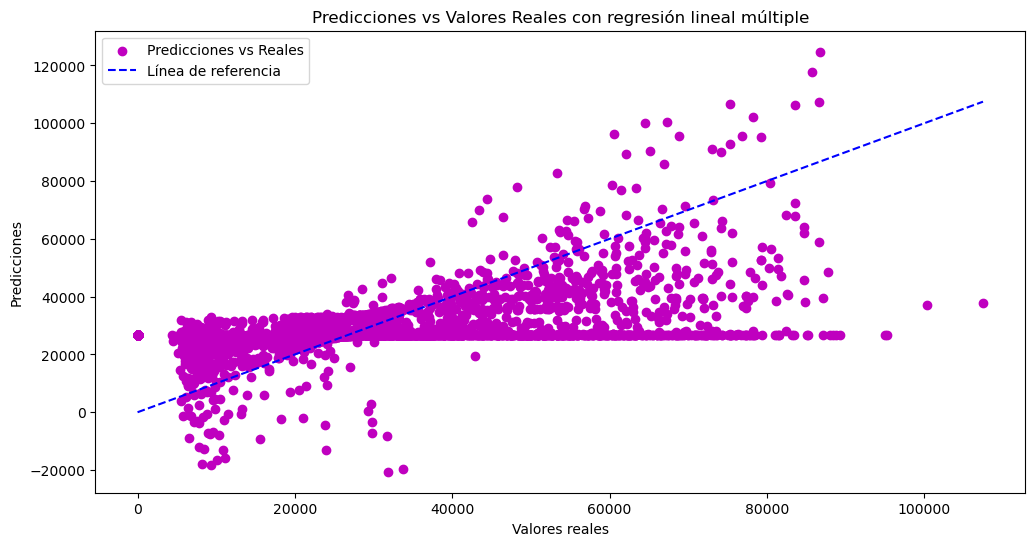

RMSE: 17957.372484478972
RSE del modelo Backward con OLS: 17972.410063514253


In [123]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


Xtrain_with_intercept = sm.add_constant(XtrainBackward)  
Xtest_with_intercept = sm.add_constant(XtestBackward)

# Ajuste del modelo OLS
ols_model = sm.OLS(ytrain, Xtrain_with_intercept)
ols_results = ols_model.fit()

# Imprimir el resumen del modelo OLS
print(ols_results.summary())

# Hacer predicciones con el modelo OLS
ypredBackward = ols_results.predict(Xtest_with_intercept)

# Evaluar el modelo (R²)
r2Backward = r2_score(ytest, ypredBackward)
print("R² del modelo Backward con OLS:", r2Backward)

# Ver los valores p
print("\nValores p de las características:")
print(ols_results.pvalues)

# Ver el valor F
print("\nValor F del modelo:")
print(ols_results.f_pvalue)

yHat = ols_results.predict(sm.add_constant(XtestBackward))

plt.figure(figsize=(12, 6))
plt.scatter(ytest, yHat, color='m', label='Predicciones vs Reales')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='b', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales con regresión lineal múltiple')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(ytest, ypredBackward))
print("RMSE:",rmse)

residuals = ytest - ypredBackward

n = len(ytest)
p = Xtrain_with_intercept.shape[1]  
# Calcular el RSE (Residual Standard Error)
rse = np.sqrt(np.sum(residuals**2) / (n - p))

print(f"RSE del modelo Backward con OLS: {rse}")


En mi caso, en la gráfica de arriba puedo observar que los puntos magenta tienen una tendencia ascendente coherente con la lógica del modelo: cuando los valores reales aumentan, también lo hacen las predicciones. Sin embargo, existe una dispersión considerable alrededor de la línea, lo que indica que el modelo tiene limitaciones para ajustarse con precisión a los datos reales. Se aprecian errores grandes especialmente en los valores altos, donde las predicciones tienden a subestimar o sobreestimar los precios.

La línea azul discontinua representa la línea de referencia y = x, es decir, el escenario ideal en el que cada predicción coincide exactamente con el valor real. Mientras más cerca estén los puntos a esta línea, mejor es la capacidad predictiva del modelo.

Este comportamiento es consistente con el R2 obtenido (~0.23), que muestra que el modelo explica solo una parte de la variabilidad del Precio Medio.

Al calcular las métricas de error de mi modelo, obtuve un RMSE de 17,957 y un RSE de 17,972. En mi caso, significa que en promedio el modelo se equivoca alrededor de 17,957 unidades al predecir. Mientras más bajo sea este valor, mejor es el ajuste del modelo. Recordando que estoy trabajando con umbrales de cifras de aproximadamente 100,000 unidades.

Mi valor de 17,972 indica que la variabilidad típica de los residuos es prácticamente la misma que la del RMSE, lo cual tiene sentido porque el número de predictores que usé es pequeño comparado con la cantidad de observaciones.

In [124]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrainescalada = scaler.fit_transform(XtrainBackward)
xtestescalada = scaler.transform(XtestBackward)

knn_reg = KNeighborsRegressor(n_neighbors=5)


Después de haber trabajado con regresión lineal múltiple, quise comprobar el desempeño de mis datos con un modelo no lineal. Para esto utilicé el algoritmo K-Nearest Neighbors (KNN) de regresión, que a diferencia de la regresión lineal no asume una relación lineal entre las variables independientes y la variable dependiente. En lugar de estimar coeficientes, KNN predice el valor de un punto nuevo tomando el promedio de los valores de sus k vecinos más cercanos; en mi caso seleccioné k=5.
Primero normalicé mis datos usando StandardScaler, ya que KNN es sensible a la escala de las variables: si una variable tiene valores mucho más grandes que otra, dominaría la métrica de distancia y sesgaría las predicciones. Con esto me aseguré de que todas las variables tuvieran media 0 y desviación estándar 1.

Después entrené el modelo con los datos escalados de entrenamiento y realicé predicciones sobre el conjunto de prueba. Evalué los resultados con dos métricas:

El RSE (Residual Standard Error), que me dio un valor de aproximadamente 3611, mucho más bajo que en el modelo lineal. Esto indica que los errores de predicción son más pequeños en promedio.

El R² = 0.969, lo que significa que el modelo KNN logra explicar cerca del 97% de la variabilidad del Precio Medio.

Este resultado muestra que, al menos para mis datos, el modelo no lineal con KNN se ajusta mucho mejor que la regresión lineal múltiple, y es que el Precio Medio no depende de manera puramente lineal de las variables que usé como predictores, sino que presenta relaciones más complejas que un algoritmo basado en vecinos cercanos puede capturar con mayor precisión.

In [125]:
from sklearn.metrics import mean_squared_error
knn_reg.fit(xtrainescalada, ytrain)
yHat = knn_reg.predict(xtestescalada)
r2 = knn_reg.score(xtestescalada, ytest)
RSE = np.sqrt(mean_squared_error(ytest, yHat))
print("\nRSE del modelo no lineal KNN:", RSE)
print("R^2 del modelo no lineal KNN:",r2)


RSE del modelo no lineal KNN: 3611.9422656474985
R^2 del modelo no lineal KNN: 0.9690294012104175


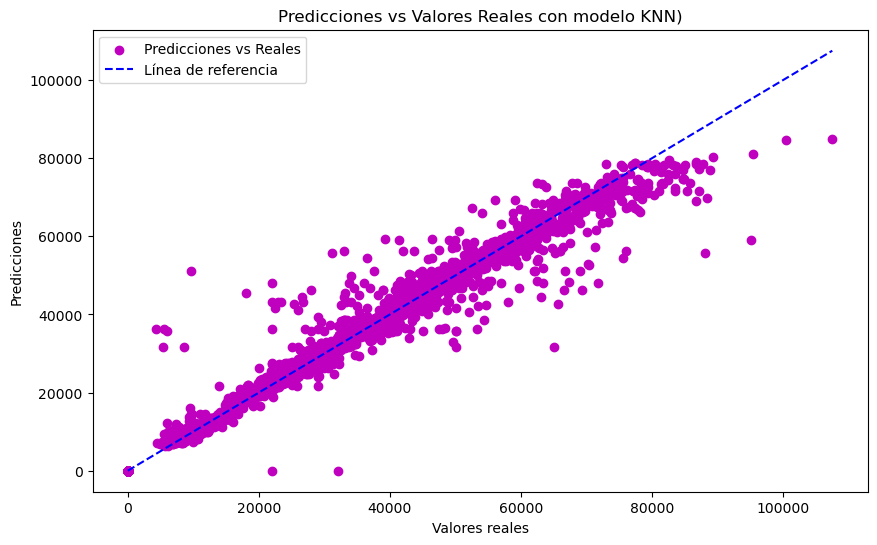

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, yHat, color='m', label='Predicciones vs Reales')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='b', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales con modelo KNN)')
plt.legend()
plt.show()

En este análisis utilicé un modelo KNN con k=5 y apliqué el método de Conformal Prediction para generar intervalos de confianza al 95% sobre mis predicciones del Precio Medio. 

Conformal Prediction toma los errores pasados de tu modelo, aprende cuán grandes pueden ser, y usa esa información para generar intervalos de predicción confiables alrededor de cada nueva predicción.

Primero, dividí mis datos en tres subconjuntos: entrenamiento, calibración y prueba. El modelo se entrenó con el conjunto de entrenamiento, y luego en la fase de calibración calculé los residuos absolutos (la diferencia entre los valores reales y las predicciones). A partir de esos residuos obtuve un cuantil que corresponde al margen de error necesario para garantizar una cobertura estadística del 95%. Ese valor resultó en un margen conformal de 19,280.15, lo que significa que, en promedio, el modelo “se cubre” añadiendo ese rango de error hacia arriba y hacia abajo en sus predicciones.

El punto clave es que al usar este método, cada predicción puntual ahora viene acompañada de un intervalo, entonces:

Para un valor real de 6,851, el modelo predijo 10,595.4, con un intervalo de confianza de [-8684.75, 29875.55] El valor real cae dentro de este rango, por lo que la predicción se considera confiable en términos de cobertura.

Para un valor real de 50,246, la predicción fue 51,757.0, con un intervalo más acotado 
[32,476.84,71,037.15], lo que refleja mayor precisión en ese punto.


Cuando analizo la cobertura global, encuentro que el 94.3% de los valores reales cayeron dentro de los intervalos del 95%, lo cual está muy cerca del nivel de confianza teórico. Esto valida estadísticamente que los intervalos están bien calibrados y que el procedimiento no solo predice valores, sino también su incertidumbre asociada.

El ancho promedio de los intervalos fue de 38,560.31, lo que indica que en promedio el modelo necesita un margen relativamente amplio para garantizar cobertura, aunque hay observaciones donde ese margen se reduce notablemente.

La gráfica confirma esta lógica: los puntos azules representan las predicciones, y las barras verticales los intervalos de confianza. La mayoría de los valores reales (en el eje X) se encuentran dentro de estas barras, lo cual respalda la validez del enfoque. Sin embargo, se aprecia que en valores altos de Precio Medio las barras se hacen más largas, lo que significa que la incertidumbre del modelo aumenta conforme los valores reales son mayores.

KNN (k=5) con Conformal Prediction (IC 95%)
R² (test): 0.7910
RMSE (test): 9,536.44
Cobertura empírica IC95%: 0.943
Ancho promedio del IC: 38,560.31
q̂ (margen conformal): 19,280.15

Inferencias (primeras 10 filas):
    Real     Pred      IC95_inf      IC95_sup  Dentro_IC
0   6851  10595.4  -8684.753534  29875.553534       True
1  50246  51757.0  32476.846466  71037.153534       True
2  17803  21217.8   1937.646466  40497.953534       True
3  19053  16484.6  -2795.553534  35764.753534       True
4      0      0.0 -19280.153534  19280.153534       True
5  33431  35048.6  15768.446466  54328.753534       True
6  27335  27128.2   7848.046466  46408.353534       True
7  58678  54874.6  35594.446466  74154.753534       True
8  17339  17675.2  -1604.953534  36955.353534       True
9  24816  19061.6   -218.553534  38341.753534       True


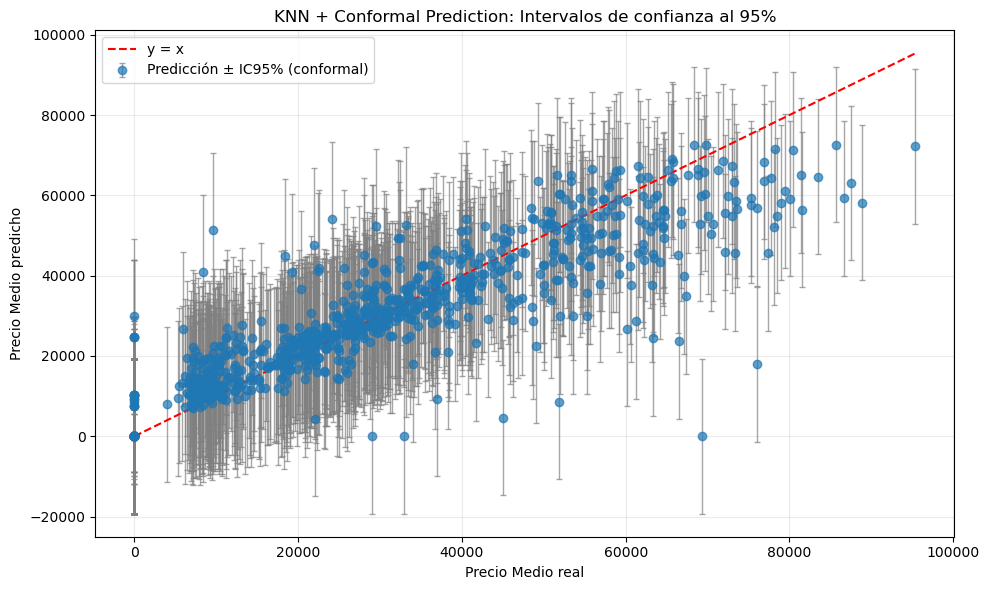

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

features = [c for c in df.columns if c not in ["PRECIO_MEDIO", "ID_ENTIDAD", "ANIO"]]
X = df[features].apply(pd.to_numeric, errors="coerce").replace([np.inf, -np.inf], np.nan)
y = pd.to_numeric(df["PRECIO_MEDIO"], errors="coerce").replace([np.inf, -np.inf], np.nan)
mask = (~X.isna().any(axis=1)) & (~y.isna())
X, y = X.loc[mask], y.loc[mask]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_cal, y_train, y_cal = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 de 0.8 = 0.2 total

k = 5
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
pipe.fit(X_train, y_train)

y_cal_pred = pipe.predict(X_cal)
res_abs = np.abs(y_cal.values - y_cal_pred)

alpha = 0.05
q_level = (1 - alpha) * (1 + 1/len(res_abs))
q_hat = np.quantile(res_abs, q_level if q_level < 1 else 1.0)

y_pred = pipe.predict(X_test)
lower = y_pred - q_hat
upper = y_pred + q_hat

r2  = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
coverage = np.mean((y_test.values >= lower) & (y_test.values <= upper))
ancho_prom = np.mean(upper - lower)

print(f"KNN (k={k}) con Conformal Prediction (IC 95%)")
print(f"R² (test): {r2:.4f}")
print(f"RMSE (test): {rmse:,.2f}")
print(f"Cobertura empírica IC95%: {coverage:.3f}")
print(f"Ancho promedio del IC: {ancho_prom:,.2f}")
print(f"q̂ (margen conformal): {q_hat:,.2f}")

inference_df = pd.DataFrame({
    "Real": y_test.values,
    "Pred": y_pred,
    "IC95_inf": lower,
    "IC95_sup": upper,
    "Dentro_IC": (y_test.values >= lower) & (y_test.values <= upper)
})
print("\nInferencias (primeras 10 filas):")
print(inference_df.head(10))

order = np.argsort(y_test.values)
y_real_ord = y_test.values[order]
y_pred_ord = y_pred[order]
lo_ord = lower[order]
up_ord = upper[order]

low_err = np.clip(y_pred_ord - lo_ord, 0, None)
up_err  = np.clip(up_ord - y_pred_ord, 0, None)

plt.figure(figsize=(10,6))
plt.errorbar(
    y_real_ord, y_pred_ord,
    yerr=np.vstack([low_err, up_err]),
    fmt='o', ecolor='gray', elinewidth=1, capsize=2, alpha=0.7,
    label='Predicción ± IC95% (conformal)'
)
mn, mx = float(np.min(y_real_ord)), float(np.max(y_real_ord))
plt.plot([mn, mx], [mn, mx], 'r--', label='y = x')
plt.xlabel("Precio Medio real")
plt.ylabel("Precio Medio predicho")
plt.title("KNN + Conformal Prediction: Intervalos de confianza al 95%")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


## Referencias

De Estadística y Geografía, I. N. (s. f.). Datos abiertos. https://www.inegi.org.mx/datosabiertos/

Implementación de Inteligencia Artificial para redacción y bloques de código.
ChatGPT. (s/f). ChatGPT. Recuperado el 8 de septiembre de 2025, de https://chatgpt.com/ 


